# COMS21202: Symbols, Patterns and Signals #
# Lab 2:<br> Introduction to Python and Jupyter Notebooks with Python Kernel Part II #

---
Tip: You will need to refer to the help pages to complete most of these examples.

In [5]:
import numpy as np
from scipy import stats
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function

%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

## 1. Functions ##
Create a function called 'testNormal' that generates a *random sequence* of 10000 numbers from $N(0, 1)$ and returns the *mean* and *var* of the sequence.  
Call the function multiple times and observe the output.

---
Hint: use `def functionName():` to define a function in Python. Remember to indent the statements in the function.

In [30]:
def testNormal():
    r = 1 * np.random.randn(10000) + 0
    mu = np.mean(r)
    var = np.var(r)
    return [mu,var]

output = testNormal()
print(output)

[0.018886674466470969, 1.0332367866458354]


## 2. 2D Normal Distribution ##
For a 2D normal distribution $N(\mathbf{\mu},\mathbf{C})$:

$$
\mathbf{\mu}=\left [ \begin{array}{c}2\\2\end{array}\right ] \;\;\;\;\;
\mathbf{C}=\left [ \begin{array}{cc}4& 2\\2& 6\end{array}\right ] 
$$

Estimate the probability that the data members $x_1 = (1, 2)$, $x_2 = (2,8)$, $x_3 = (5,4)$ are sampled from this distribution 

---
Hint: use `stats.multivariate_normal.pdf`

In [31]:
mu = [2.0, 2.0]
cov = [[4.0, 2.0], [2.0, 6.0]]
x1=[1,2]
x2=[2,8]
x3=[5,4]

rv = stats.multivariate_normal(mu, cov)
print(rv.pdf(x1))
print(rv.pdf(x2))
print(rv.pdf(x3))

0.030630984922
0.000972400109235
0.0112685096156


## 3. Random Vectors ##

Generate a sequence of 100 random vectors from the distribution above.

---
Hint: use the command `stats.multivariate_normal.rvs`

Generate a scatter plot of the sequence using the command `plt.scatter`. 

Compute the mean and covariance for the sequence using the commands `np.mean` (consider `axis` parameter) and `np.cov` (consider `rowvar` parameter).

[ 2.09899582  2.26792861]

[[ 4.76459221  2.40927557]
 [ 2.40927557  5.89877497]]


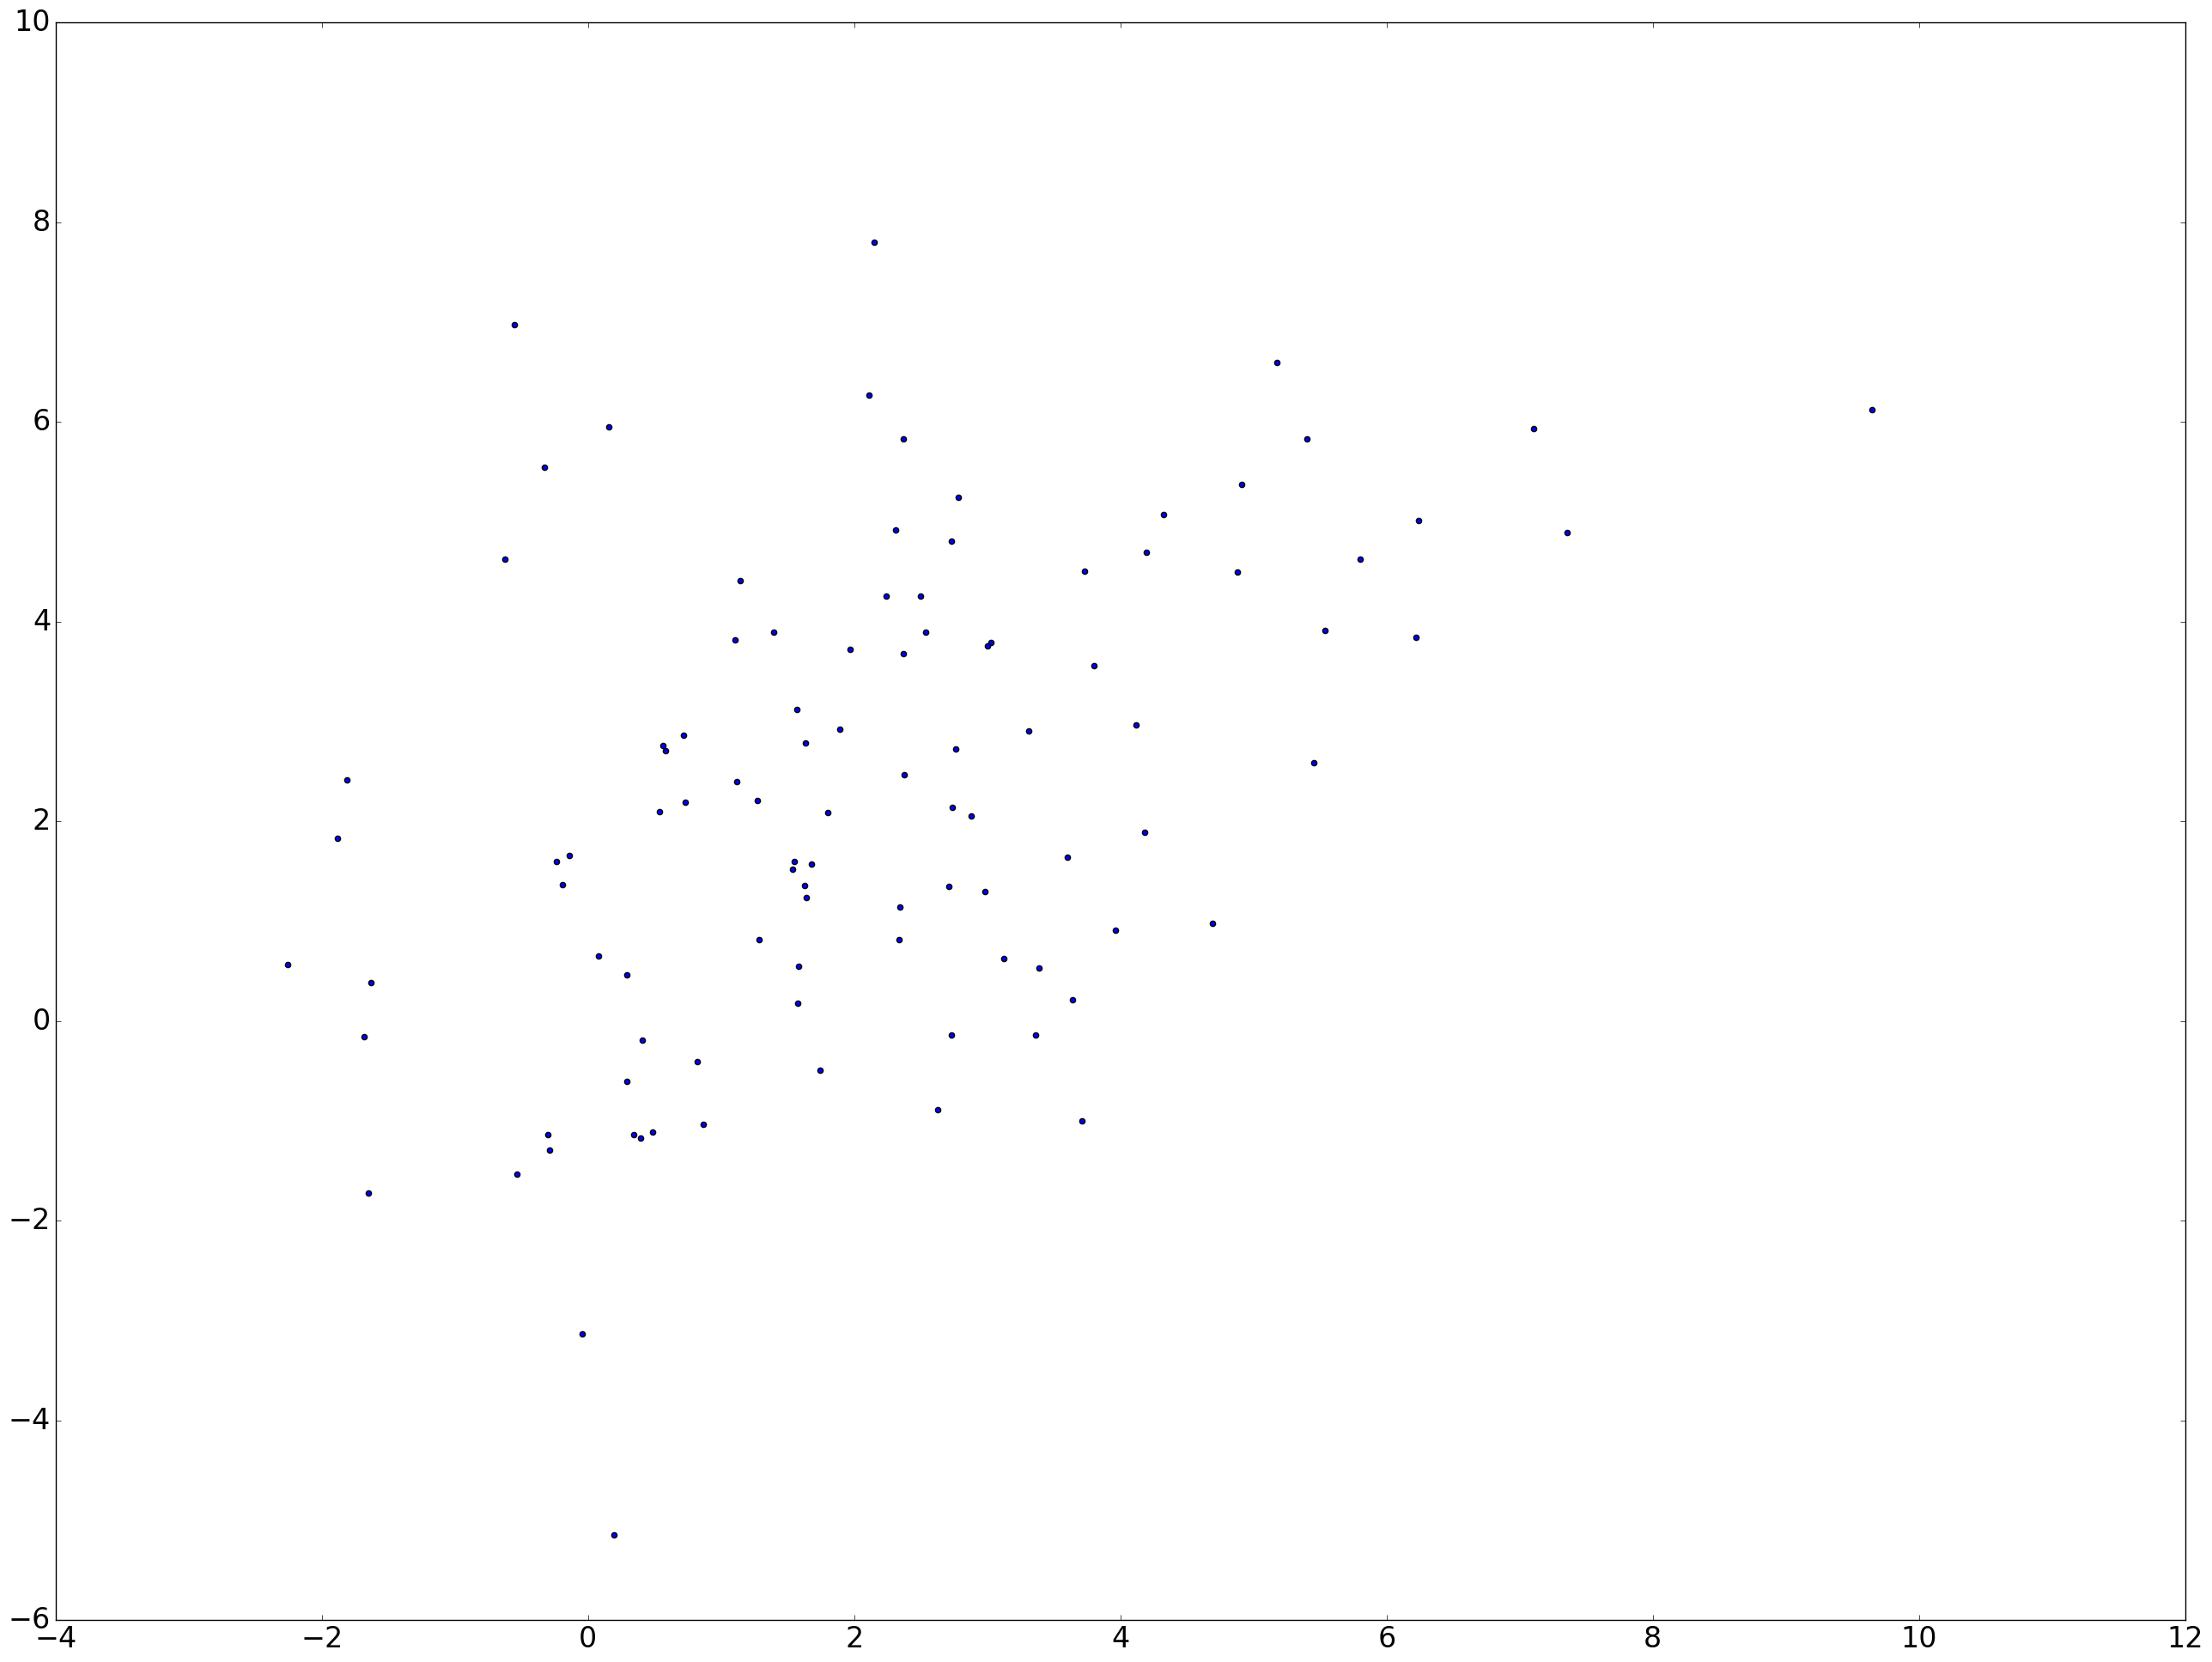

In [32]:
mu = [2.0, 2.0]
cov = [[4.0, 2.0], [2.0, 6.0]]
rv = stats.multivariate_normal(mu, cov)

seq = rv.rvs(100)
x = seq[:,0]
y = seq[:,1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)

print(np.mean(seq, axis=0))
print()
print(np.cov(seq, rowvar=False))


### Increase the sample size ###

Now, Increase the length of the sequence to 4000. Plot the new data and compute the new mean and covariance.

[ 1.95430687  1.93511604]

[[ 3.95508373  2.13183603]
 [ 2.13183603  6.07545587]]


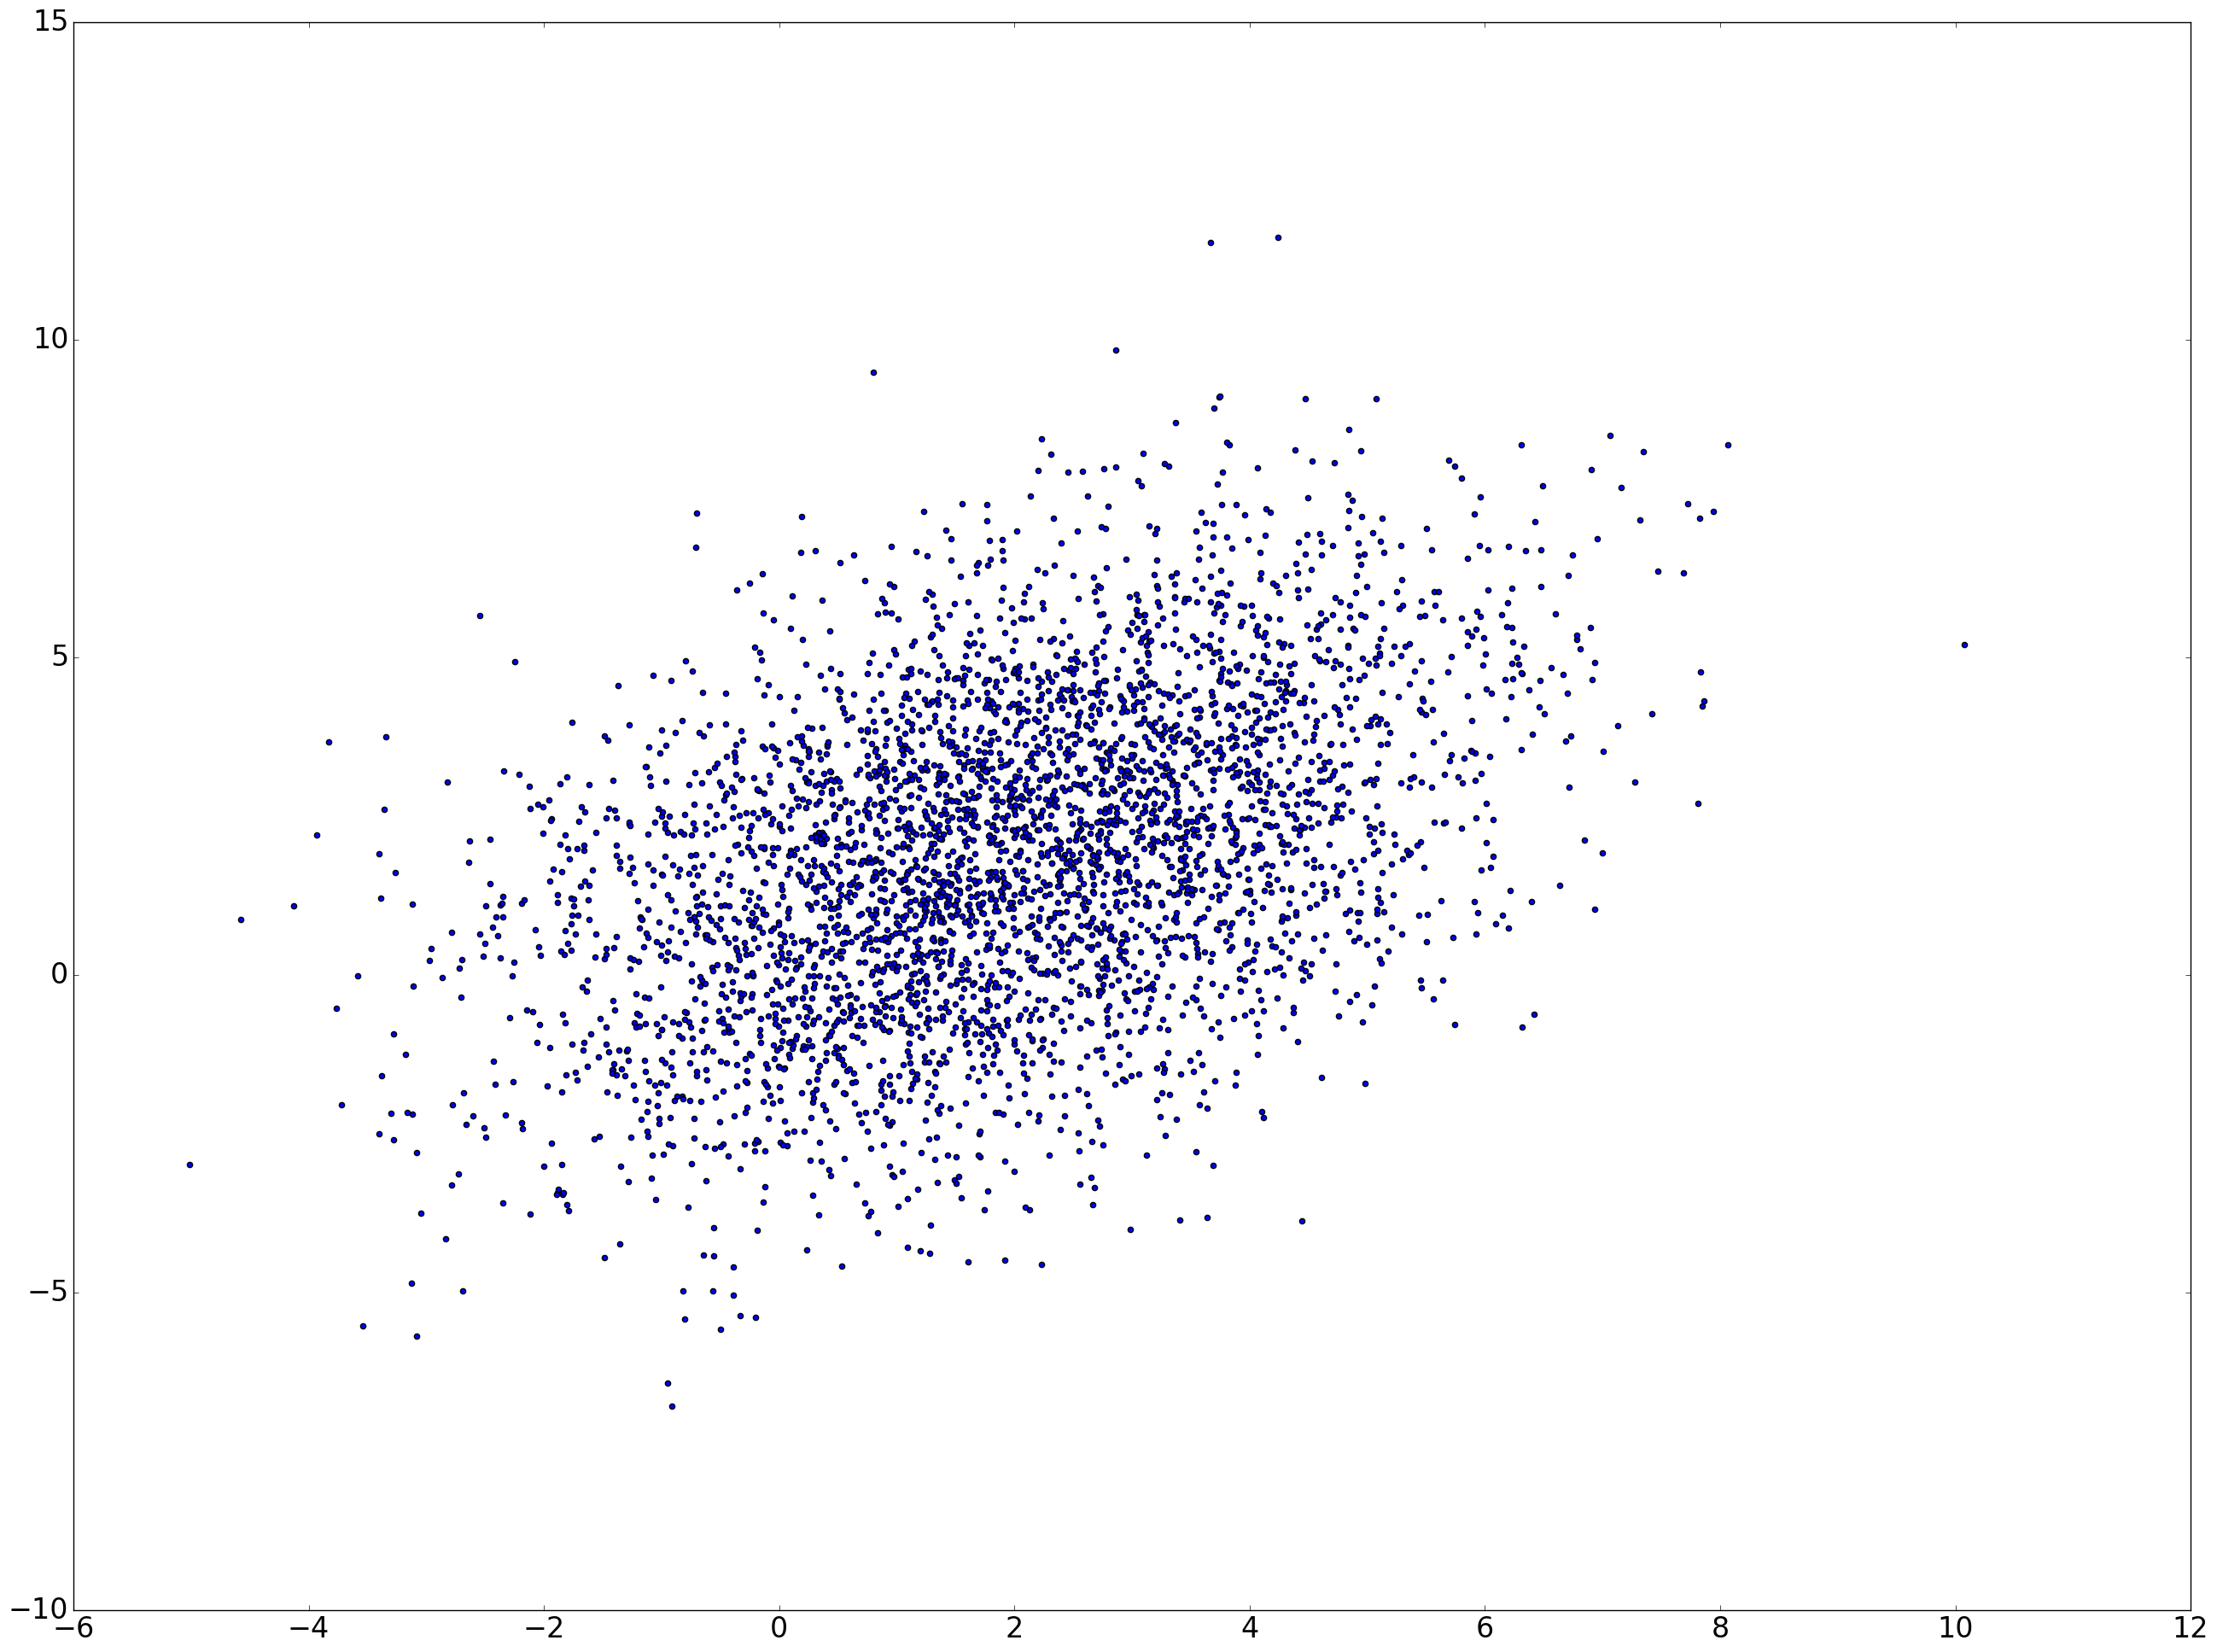

In [33]:
mu = [2.0, 2.0]
cov = [[4.0, 2.0], [2.0, 6.0]]
rv = stats.multivariate_normal(mu, cov)

seq = rv.rvs(4000)
x = seq[:,0]
y = seq[:,1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)

print(np.mean(seq, axis=0))
print()
print(np.cov(seq, rowvar=False))

### Conclusions? ###

Discuss with your lab partner and write down your conclusion in a `Markup` cell.


## 4. Matrix Inverse ##

**a) **Create a function that takes a matrix and returns its inverse.

Do not use a built-in function for this exercise.

The inverse of the matrix
$$
\vec{A}=\left [ \begin{array}{cc}
    a & b \\
    b & c\end{array}\right ]
$$

is

$$
\vec{A}^{-1}=
    \frac{1}{ac-b^2} \left [ \begin{array}{cc}
        c & -b \\
        -b & a\end{array}\right ]
$$

In [34]:
def inverse(A):
    d = A[0][0]*A[1][1] - A[1][0]*A[1][0]
    if(d != 0):
        print(d)
        d=1/d
        print(d)
        B = np.array([[A[1][1],-A[1][0]], [-A[1][0], A[0][0]]])
        B=d*B
        return B 
    else:
        return -1
         
A = np.array([[4.0, 2.0], [2.0, 6.0]])
print(A)
A = inverse(A)
print(A)

[[ 4.  2.]
 [ 2.  6.]]
20.0
0.05
[[ 0.3 -0.1]
 [-0.1  0.2]]


**b) **Call the function from the command line with different matrix configurations.

Are there any conditions that you need to check for and include in your function?

**c) **Compare the results of your function with the built-in function `np.linalg.inv`.

In [35]:
A = np.array([[4.0, 2.0], [2.0, 6.0]])
A = np.linalg.inv(A)
print(A)

[[ 0.3 -0.1]
 [-0.1  0.2]]


## 5. Debugging ##
Learn how to debug your code - magic function `%debug`. Remember that you can also check the values of your variables by printing them at any time.

Read [here](https://ipython.org/ipython-doc/1/interactive/tutorial.html#debugging) for details.

## 6. Image loading ##
**a) **Load the image `flower.png` using the command `io.imread` and display the image using the command `io.imshow`.

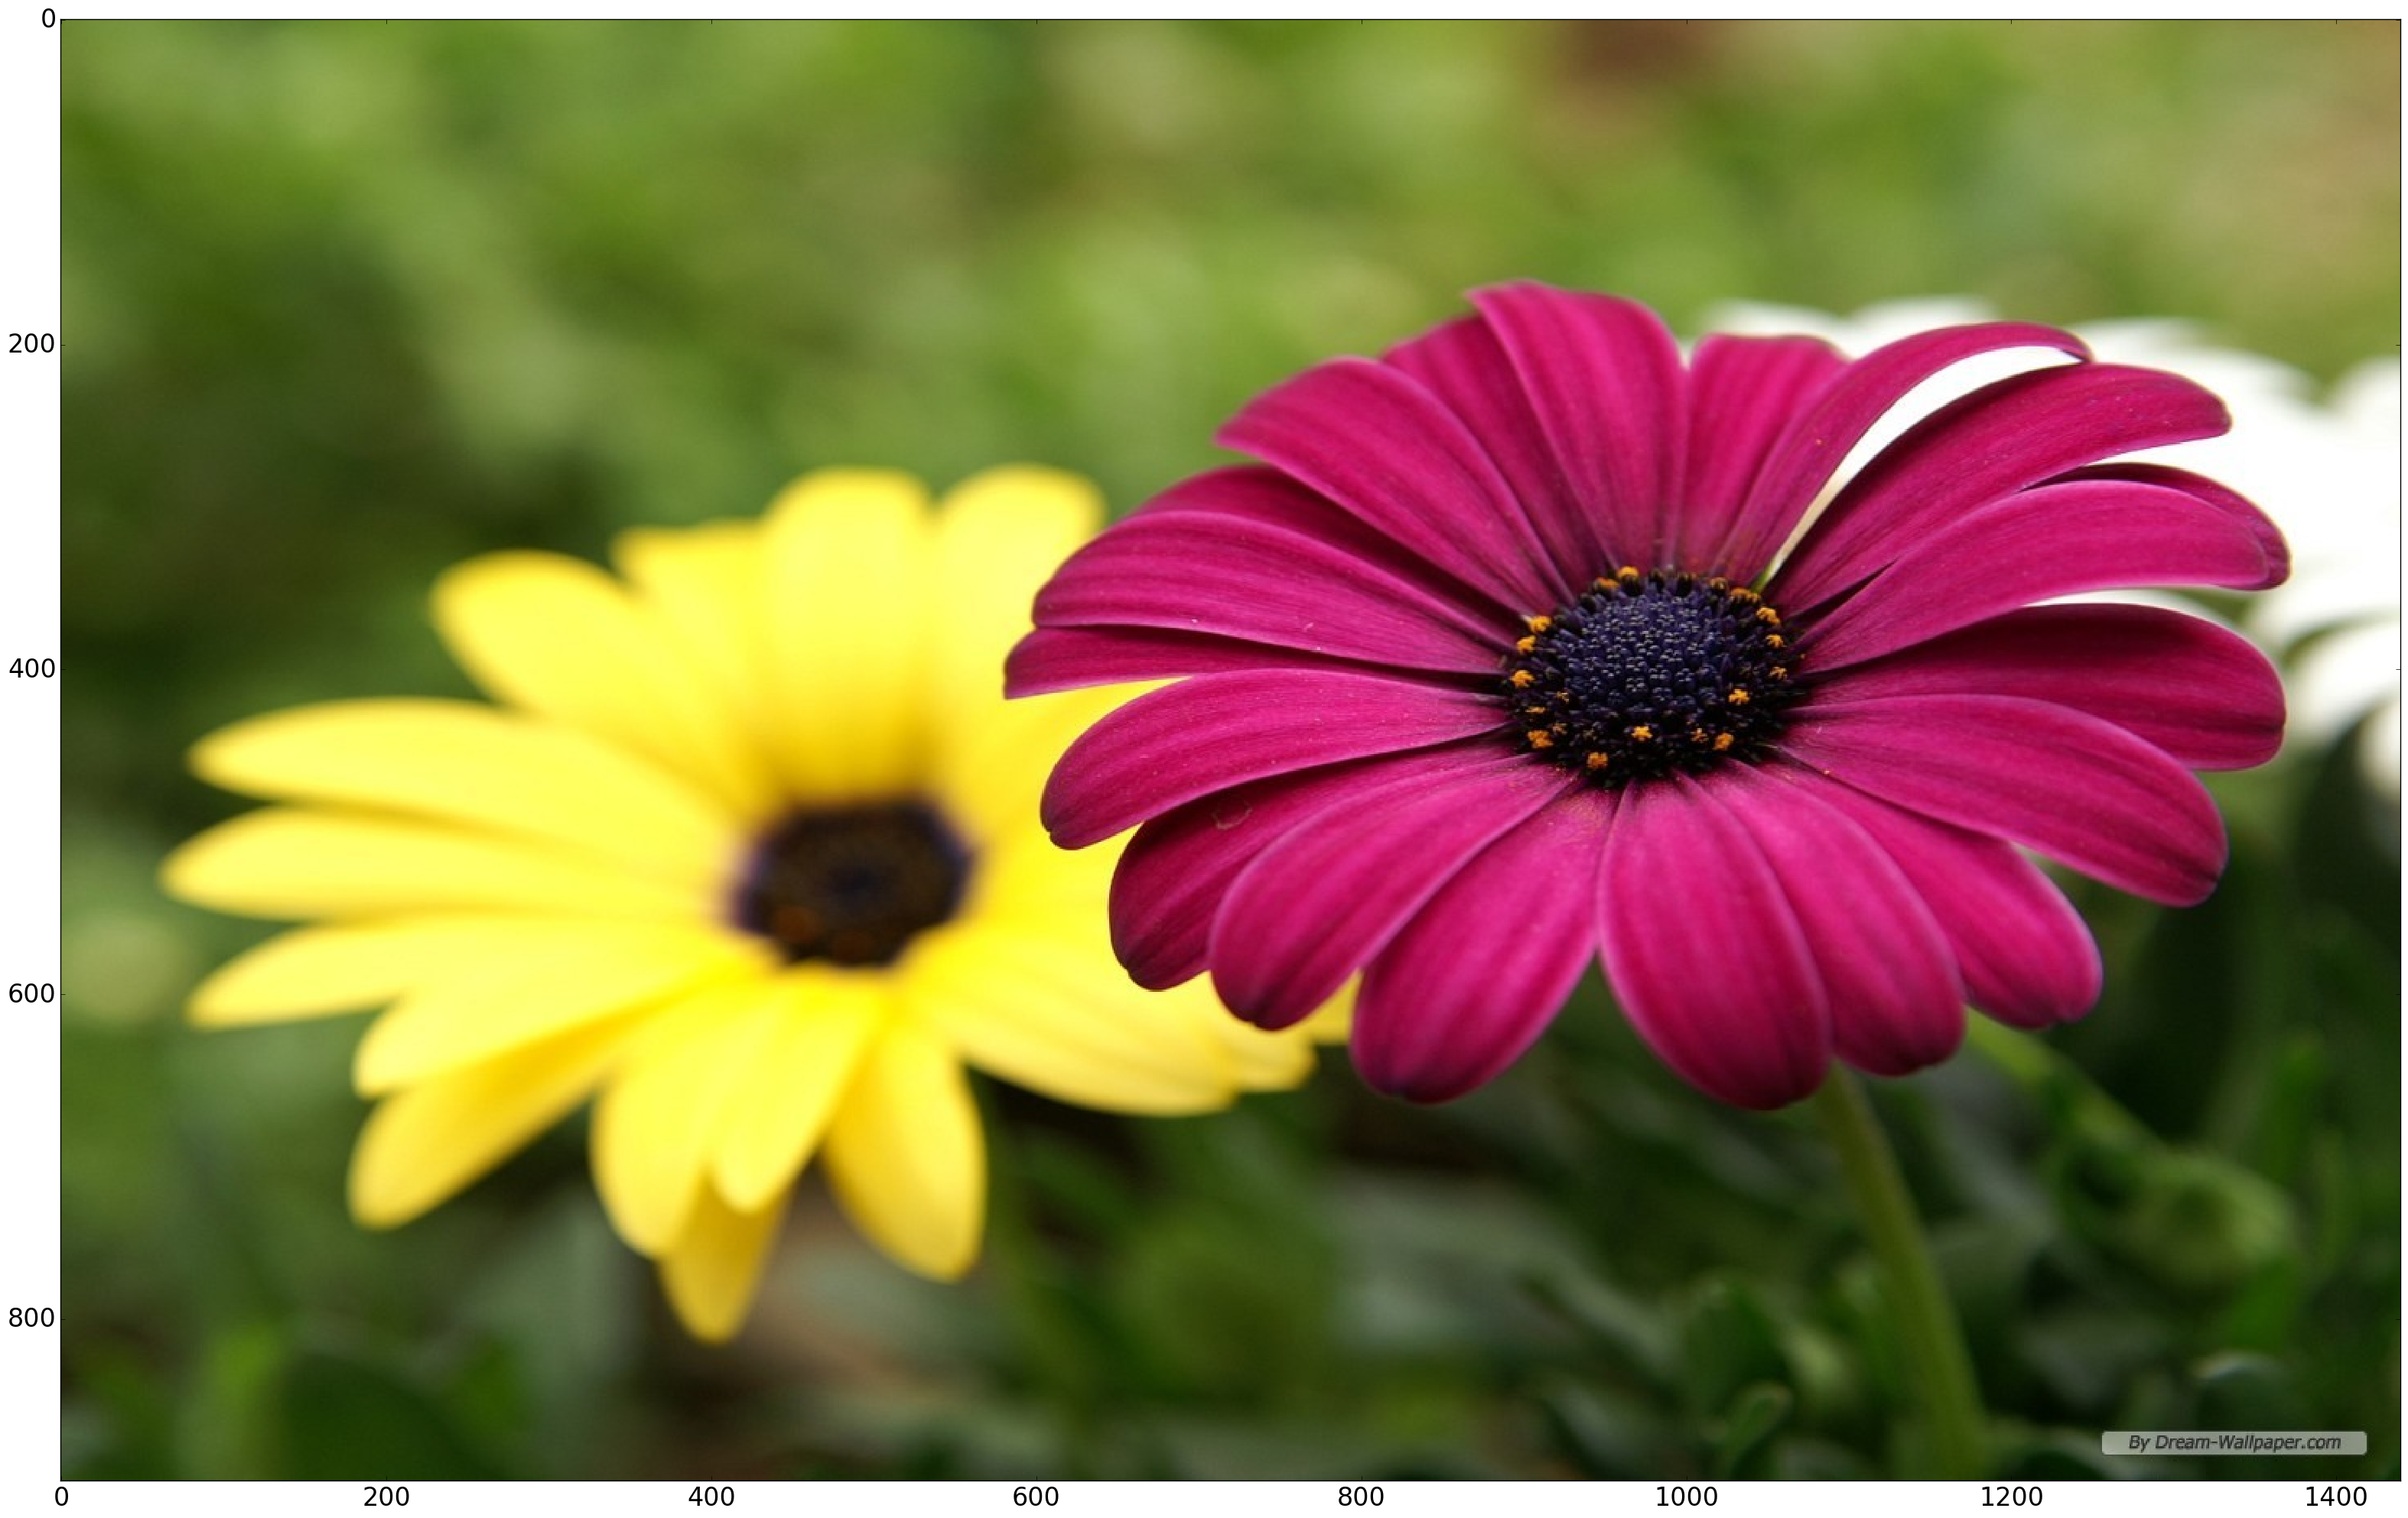

In [36]:
im = io.imread("flower.png")
io.imshow(im)

**b) **Check the size of the image matrix.

In [37]:
print(im.size)

3888000


### Discussion ###

Discuss with your lab partner what this size stands for and write down your conclusions into a `Markup` cell. Check with a lab assistant if you are not sure.

**c) **Convert the image to black and white using the command `color.rgb2gray`. Check the new image size and write down your conclusions into a `Markup` cell.

**d) **change the size of the image to half its current size using the command `transform.resize`.

(900, 1440, 3)
3888000
(900, 1440)
1296000
(450, 720)
324000


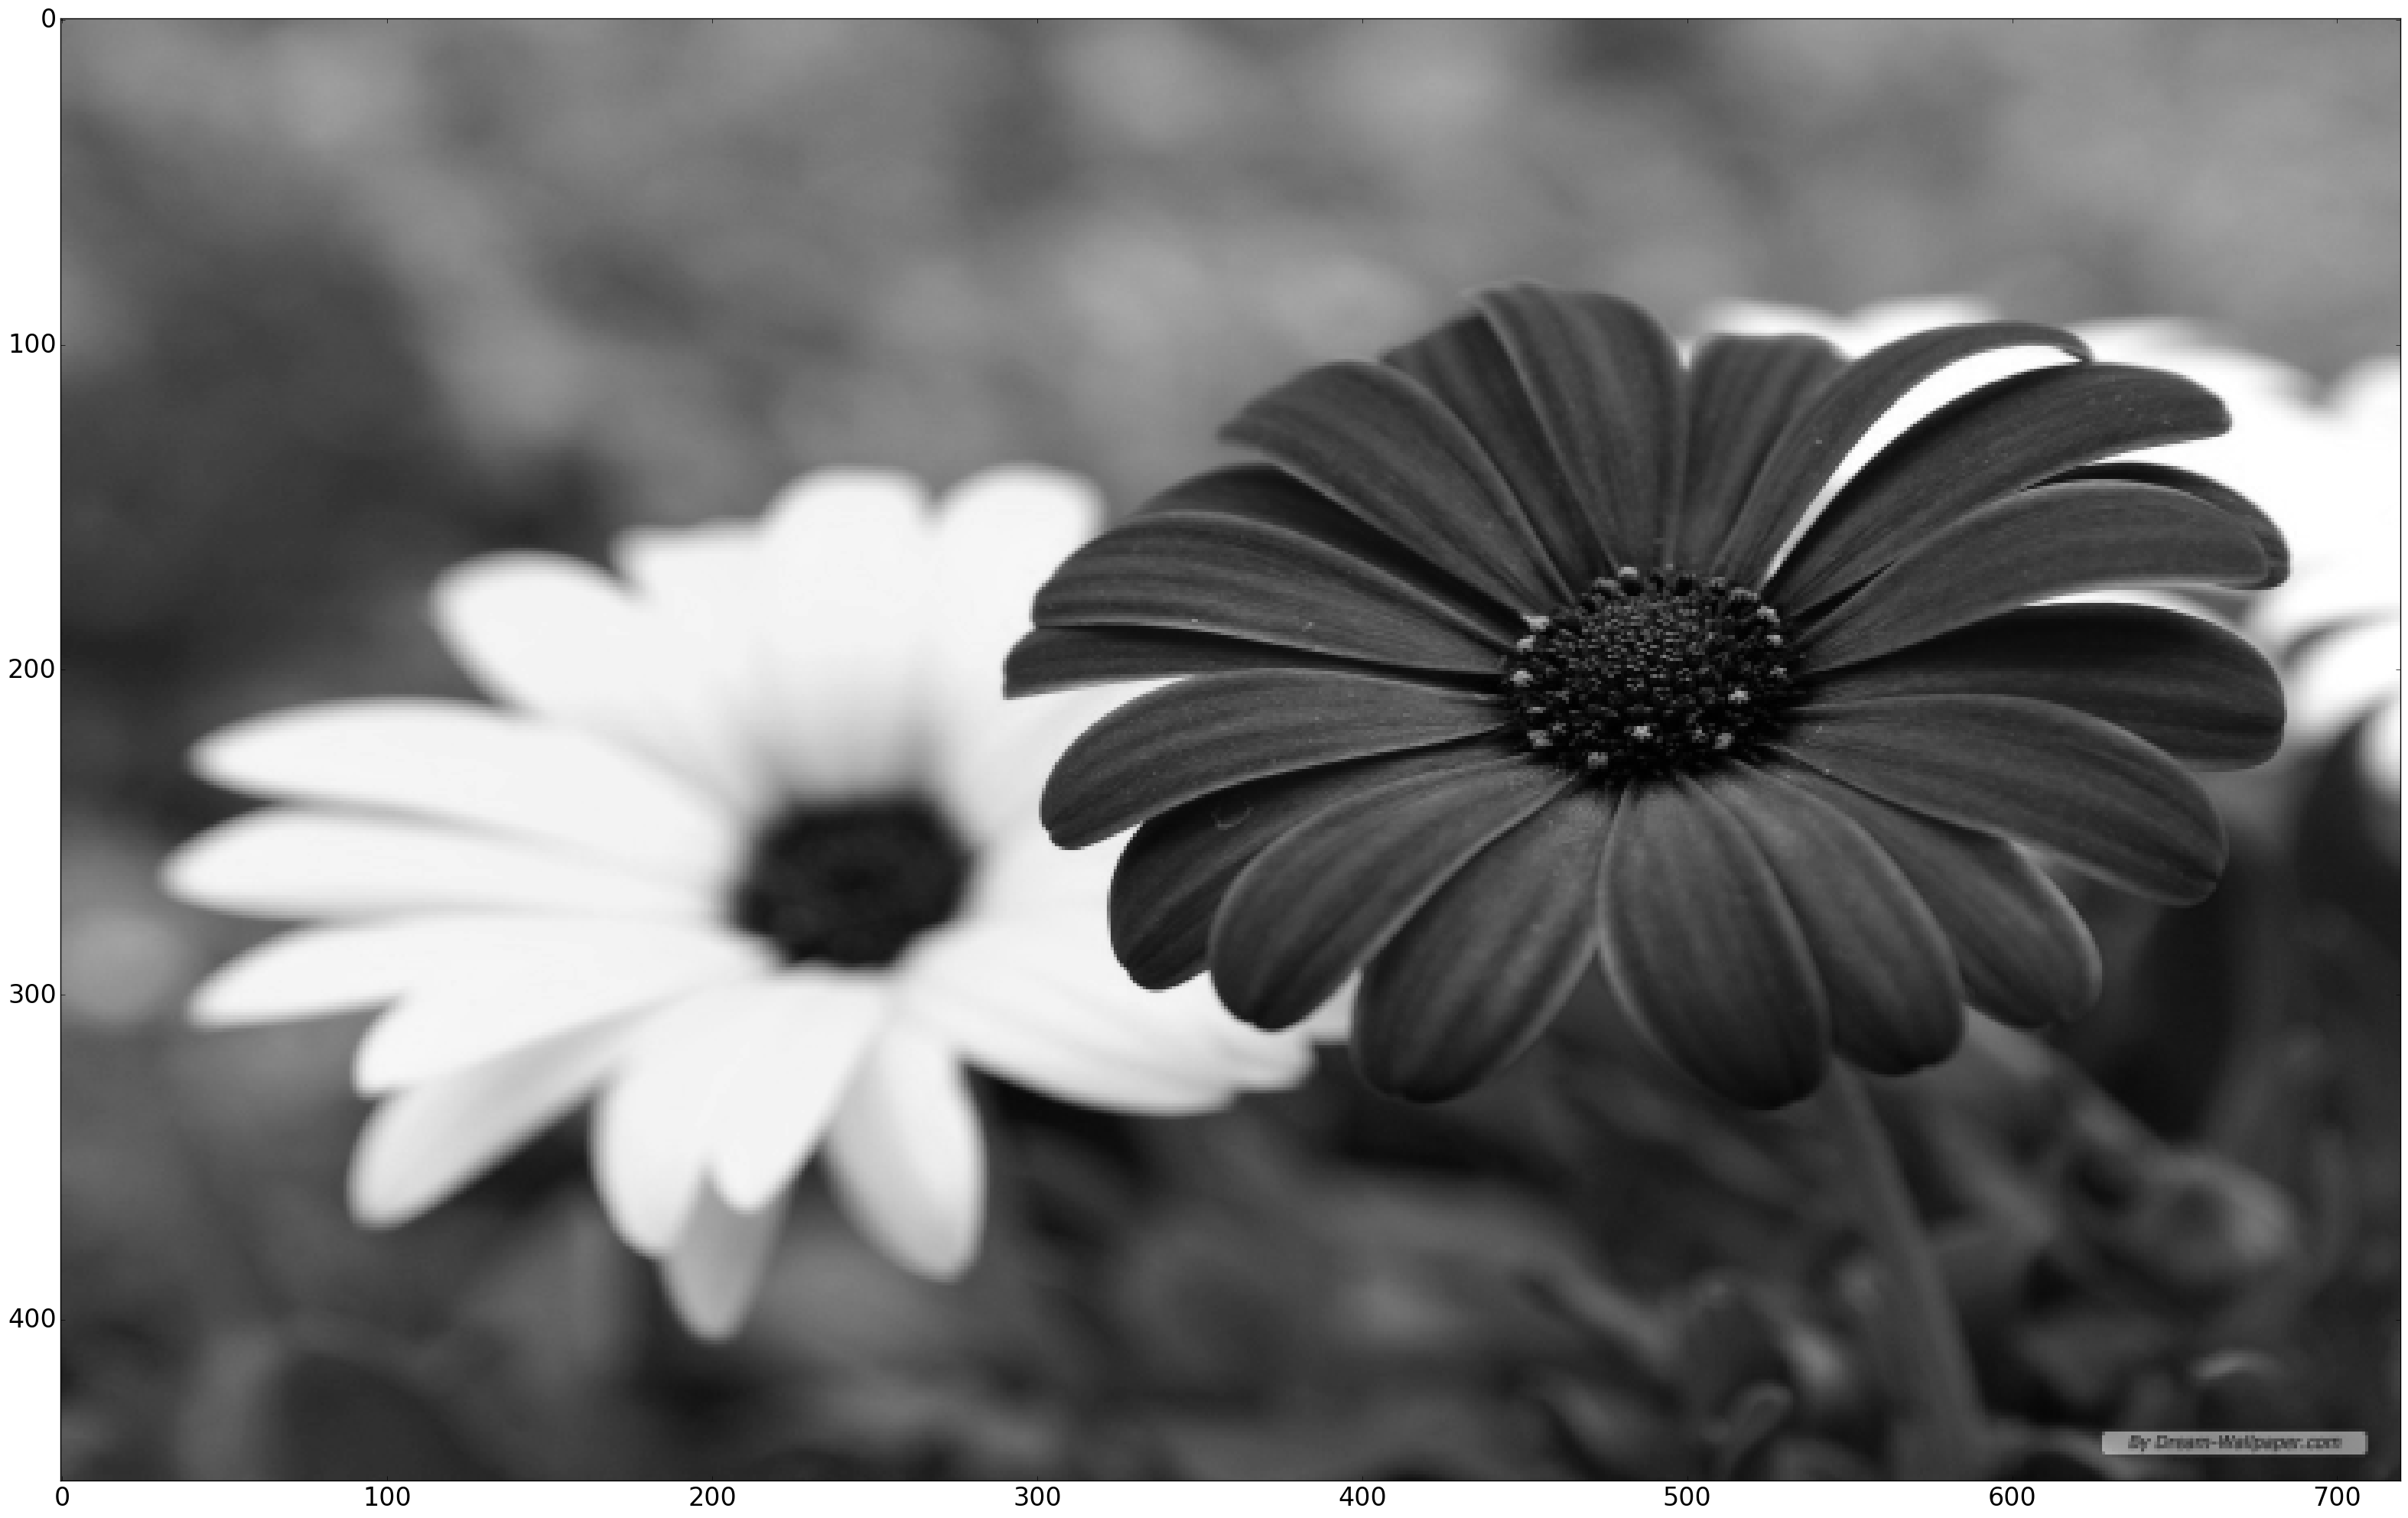

In [38]:
print(im.shape)
print(im.size)
im = color.rgb2gray(im)
print(im.shape)
print(im.size)
im = transform.resize(im, (im.shape[0]*0.5,im.shape[1]*0.5))
io.imshow(im)
print(im.shape)
print(im.size)

## 7. Image Interpretation ##
**a) **Calculate the histogram of your image's pixel values using the command `exposure.histogram` and than plot it with `imhist`. You can use the function `imhist` defined in the code cell below.

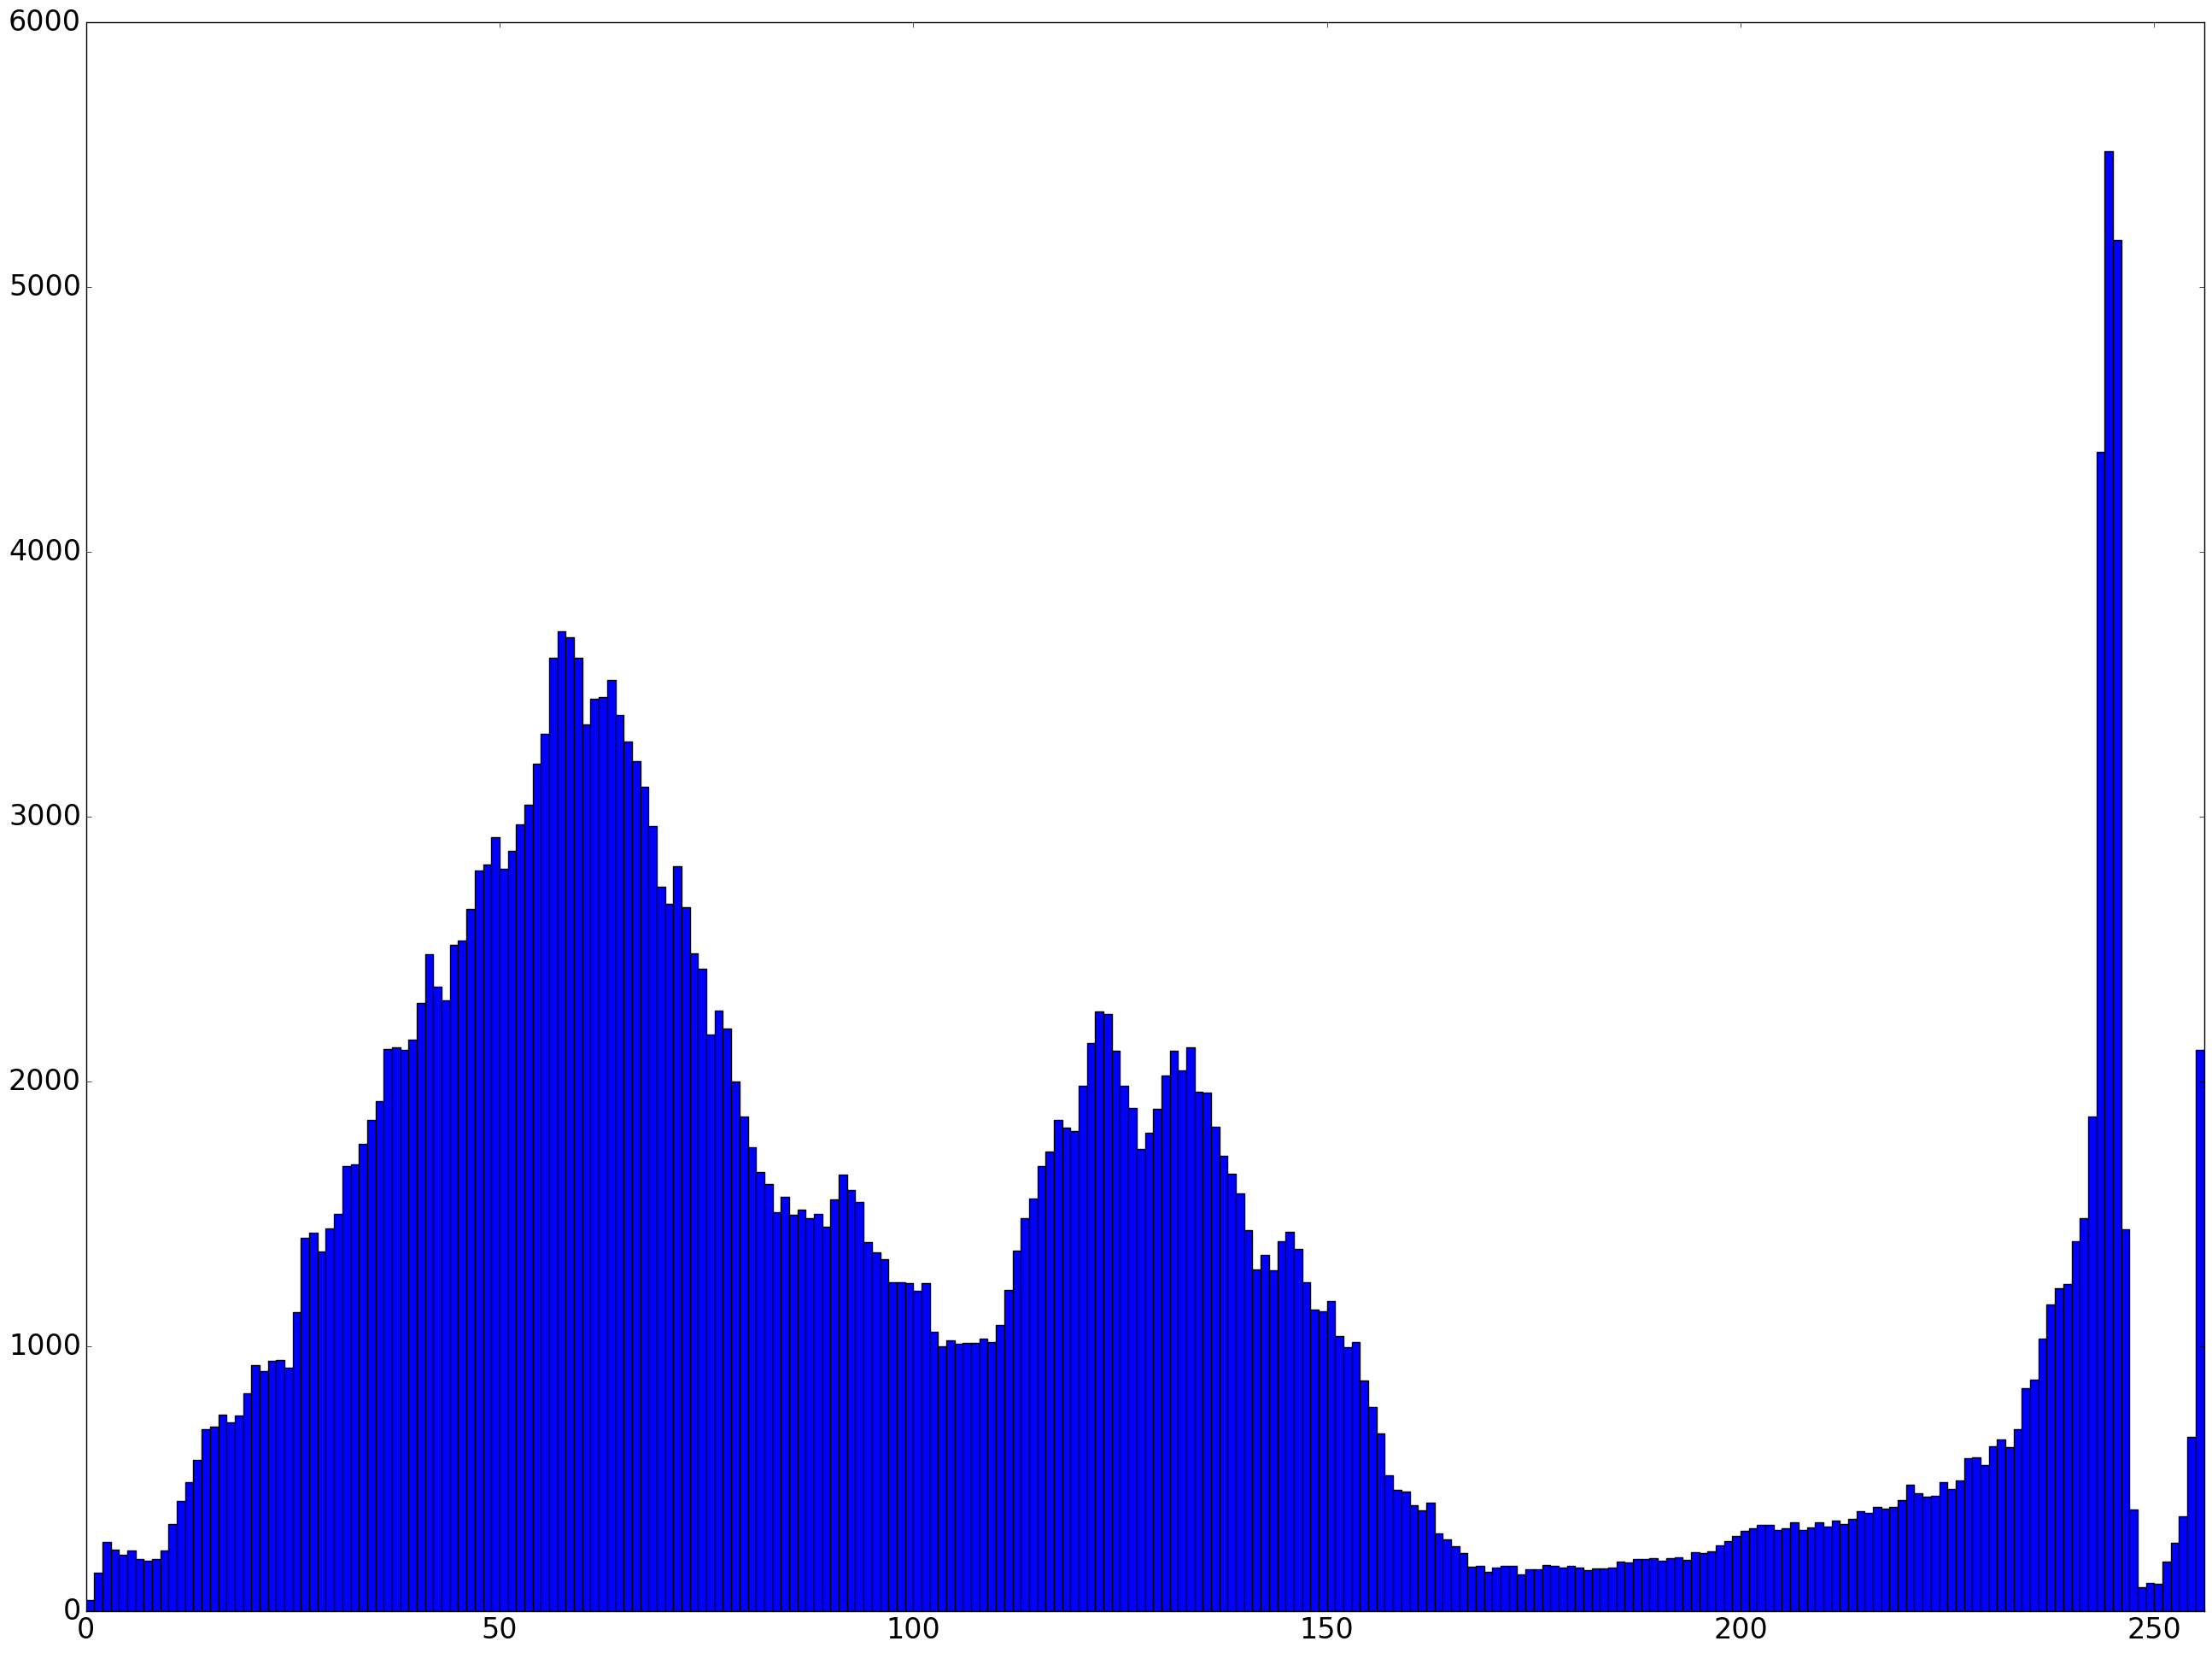

In [39]:
def imhist(img_hist):
    fig = plt.figure()
    ax = fig.add_subplot( 111 )
    ax.bar( range(256), img_hist[0], width=1 )
    ax.set_xlim(0, 256)
    plt.show()
    
hs = exposure.histogram(im)
imhist(hs)

**b) **Use the command `exposure.equalize_hist` to change the image. Plot the new image histogram and display the new image.

Study the resulting image and the histogram. Understand the effect of this command on the image quantitatively and qualitatively. Write down your conclusions into a `Markup` cell

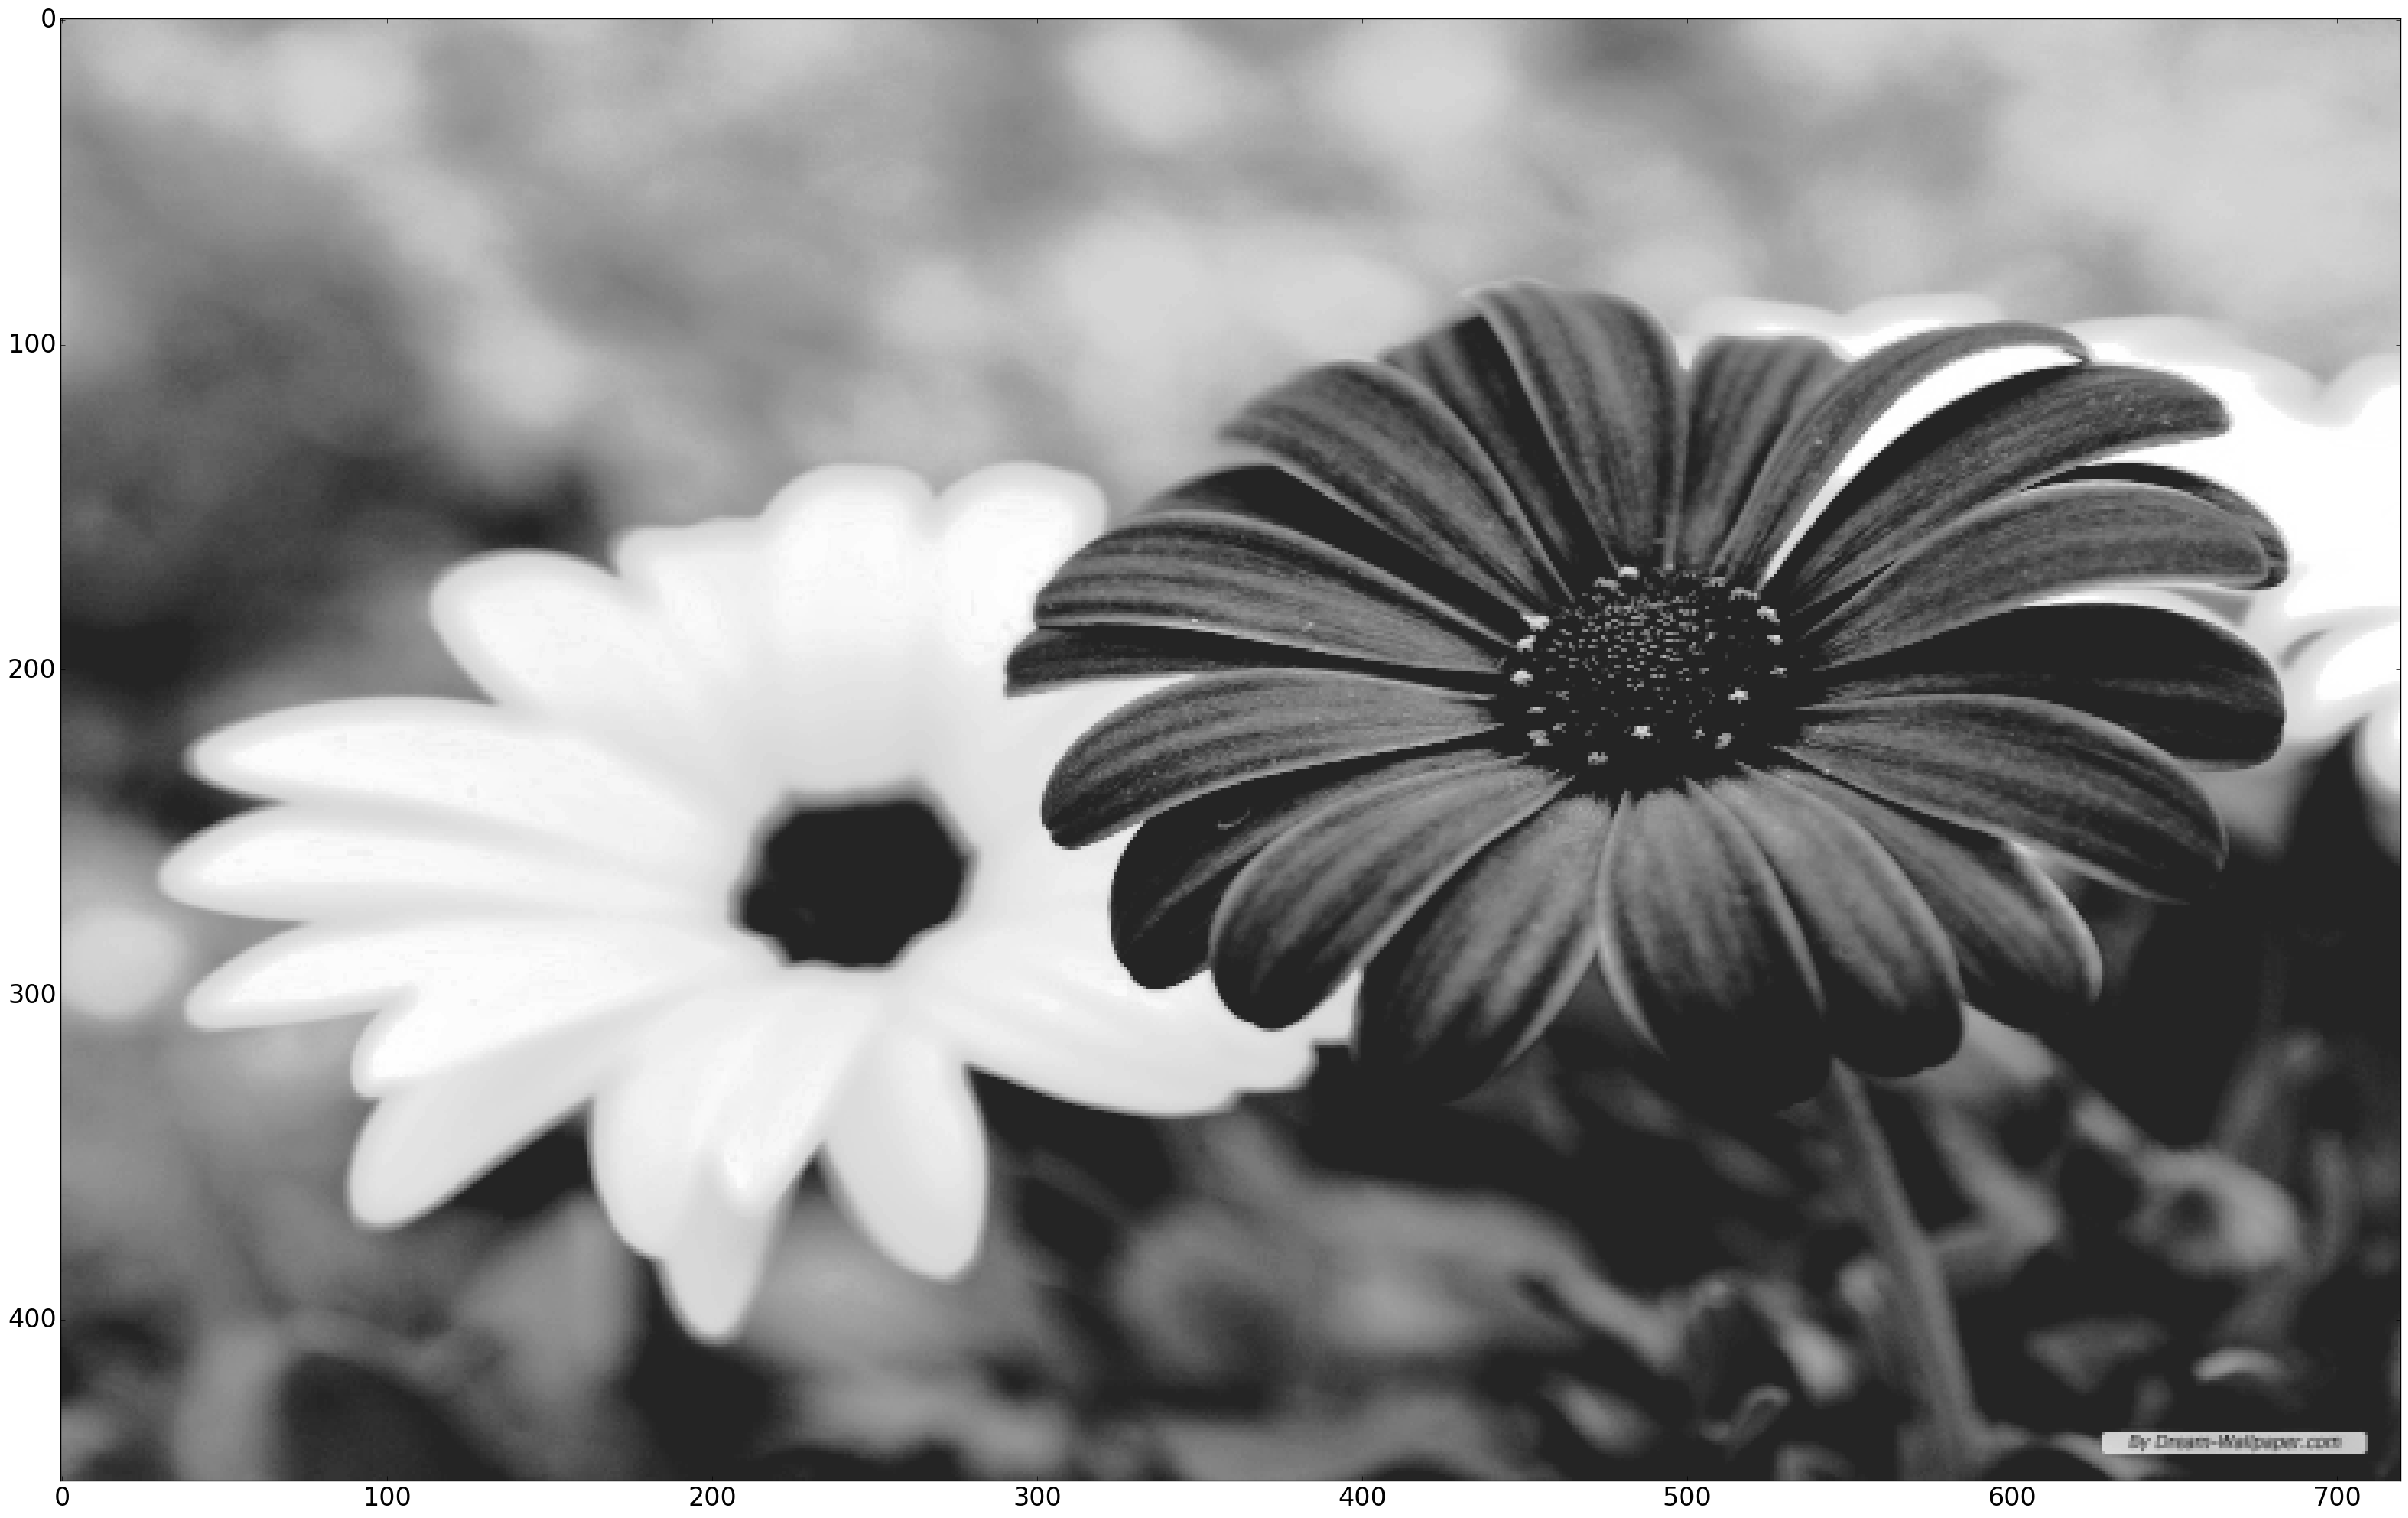

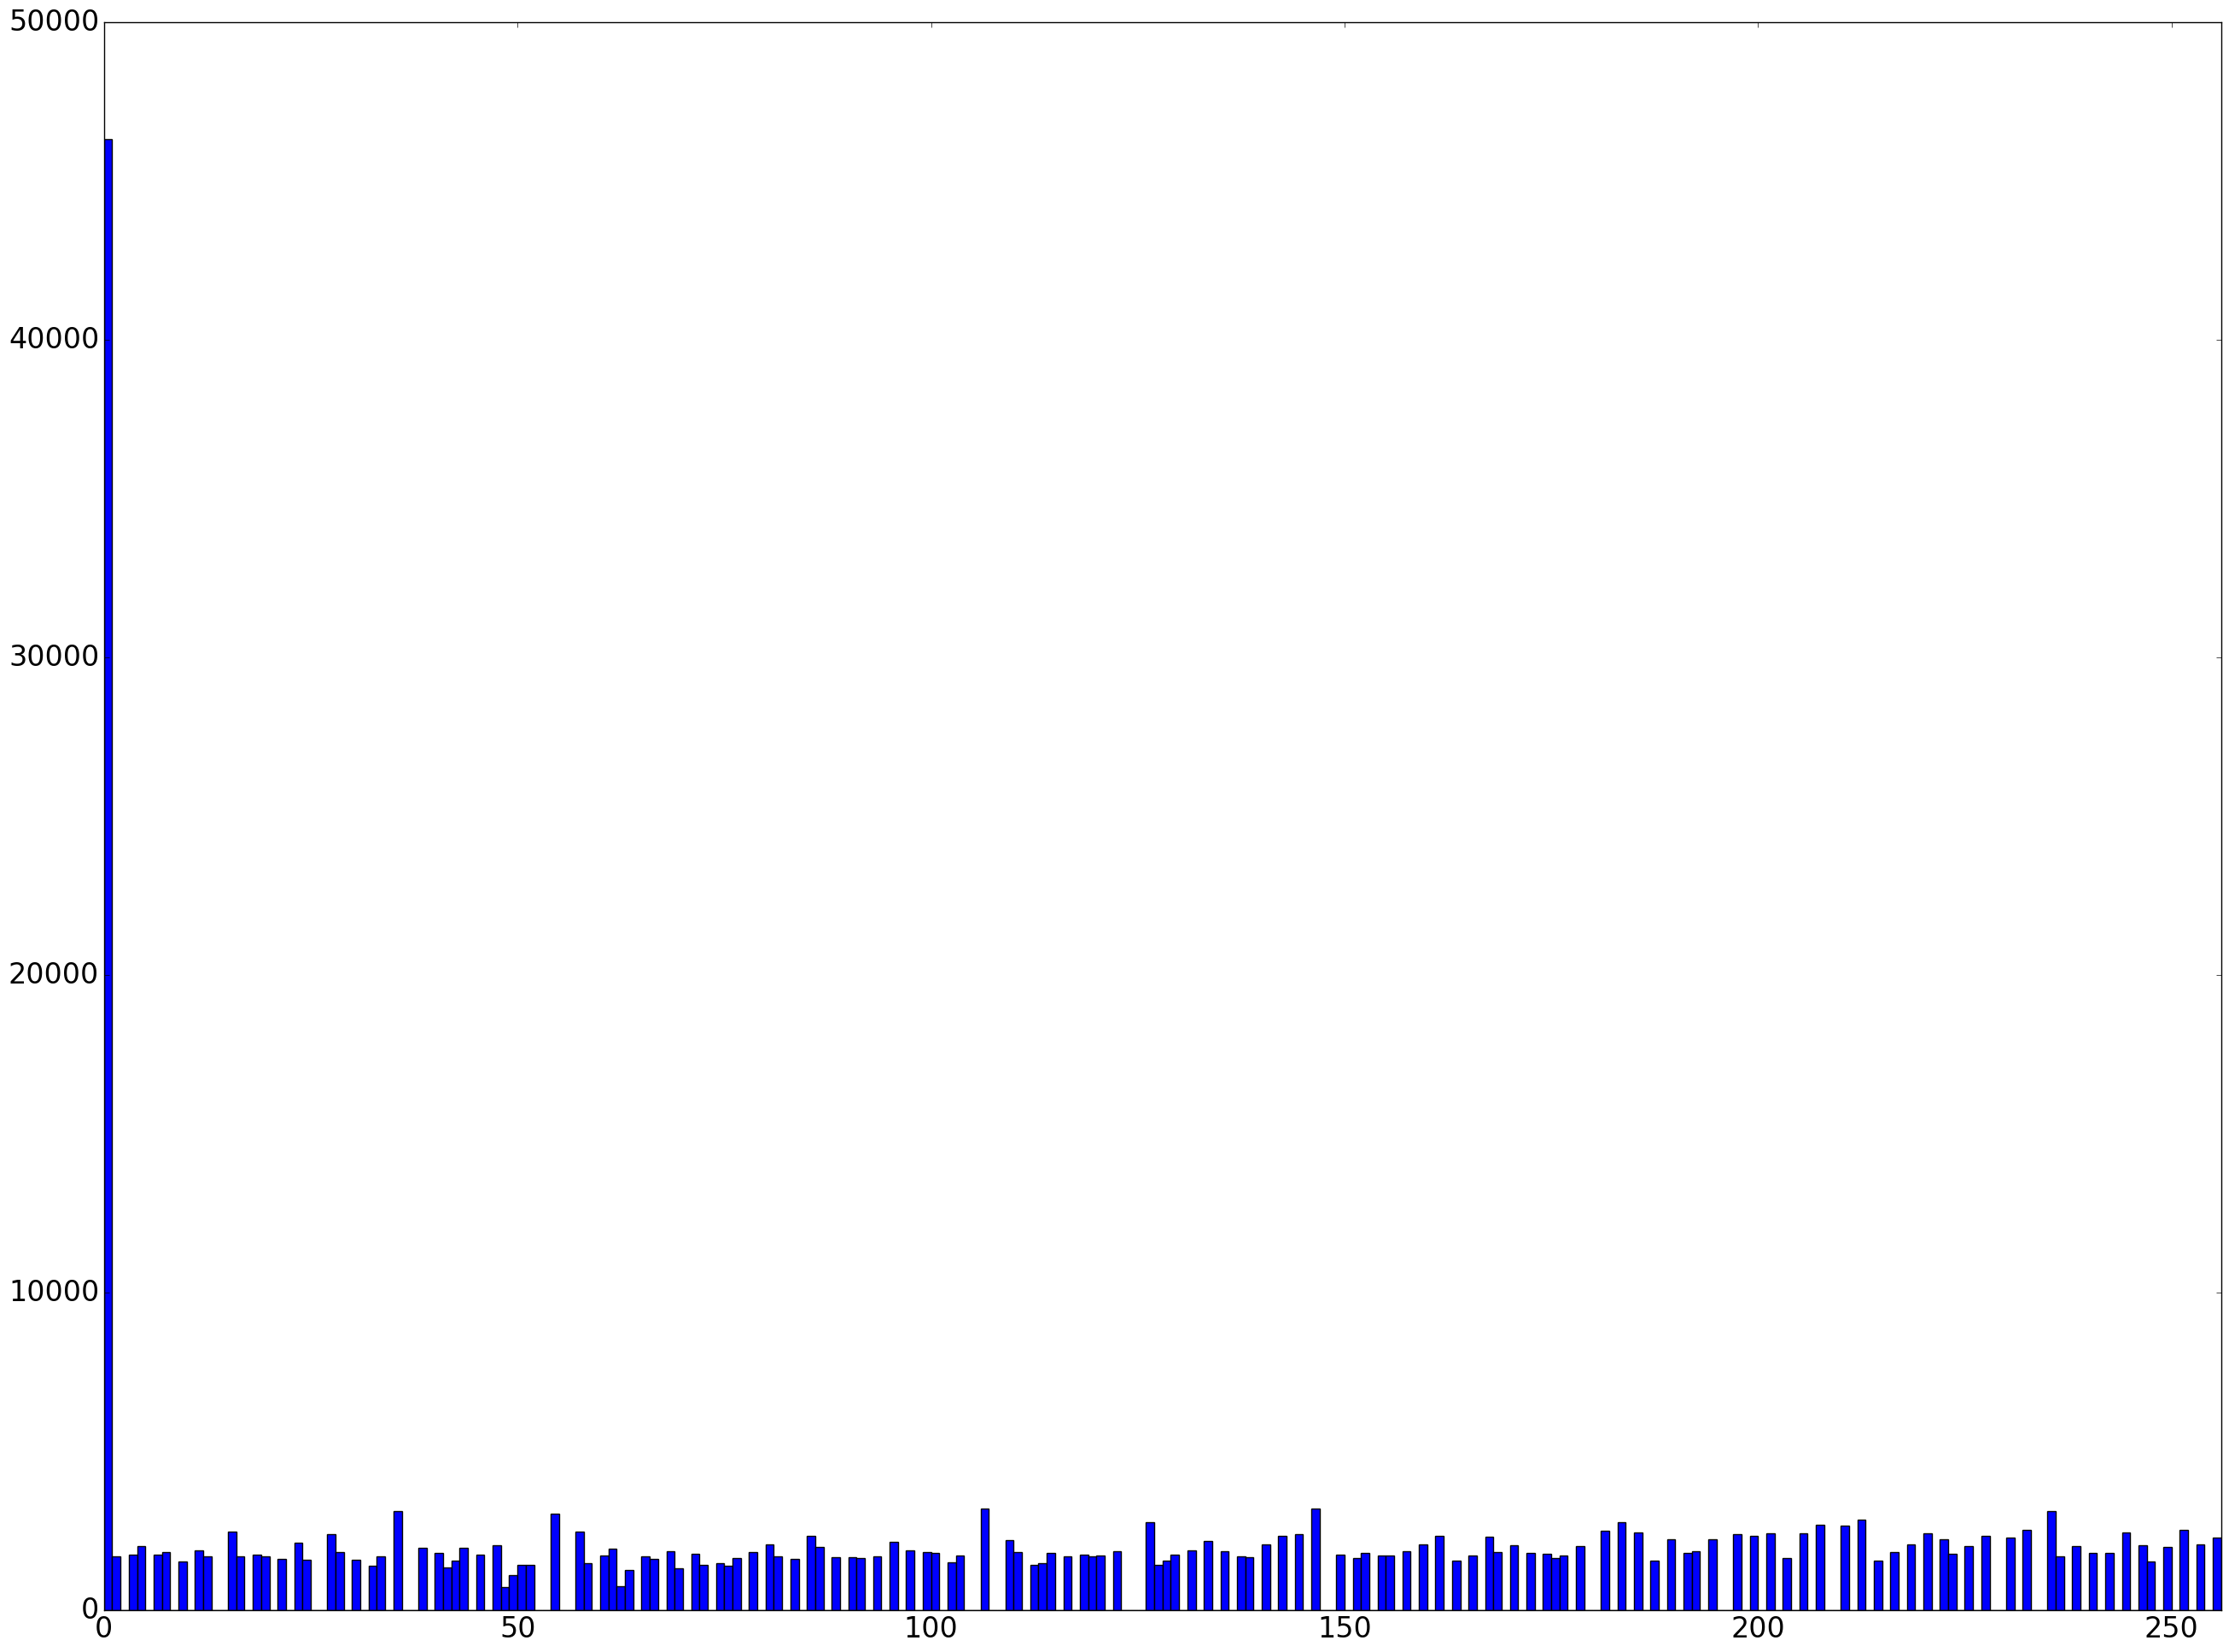

In [41]:
for num in range(0,100):
    im = exposure.equalize_hist(im)

io.imshow(im)
hs = exposure.histogram(im)
imhist(hs)

In [16]:
A = np.matrix([[1,3],[1,5],[1,6],[1,7],[1,8],[1,9],[1,10]])
B = np.transpose(A)
A = np.dot(A,B)
print(A)

[[ 10  16  19  22  25  28  31]
 [ 16  26  31  36  41  46  51]
 [ 19  31  37  43  49  55  61]
 [ 22  36  43  50  57  64  71]
 [ 25  41  49  57  65  73  81]
 [ 28  46  55  64  73  82  91]
 [ 31  51  61  71  81  91 101]]
